In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_excel('height_weight_dataset_small.xlsx')

In [6]:
df.head()

,Height_cm,Weight_kg
0,171,99
1,195,91
2,155,65
3,174,96
4,150,79


Text(0, 0.5, 'Height_cm')

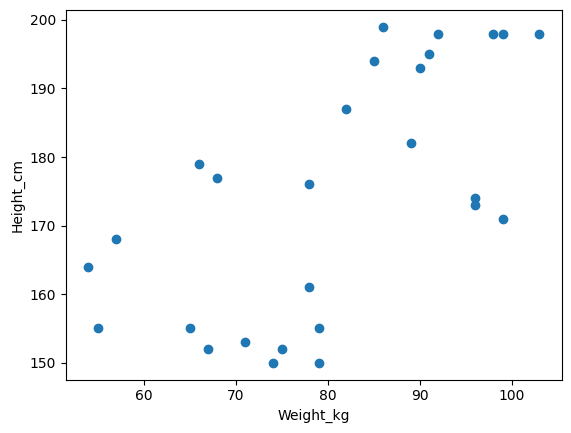

In [9]:
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel("Weight_kg")
plt.ylabel('Height_cm')

In [22]:
##divide aur dataset
X=df[['Weight_kg']]##independent feature
y=df['Height_cm']##dependent

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
X.shape

(27, 1)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21, 1), (6, 1), (21,), (6,))

In [27]:
##standardize the data
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [30]:
X_train.head()

,Weight_kg
16,78
17,98
12,99
24,71
1,91


In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

c:\Users\aojha\OneDrive\Attachments\python\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


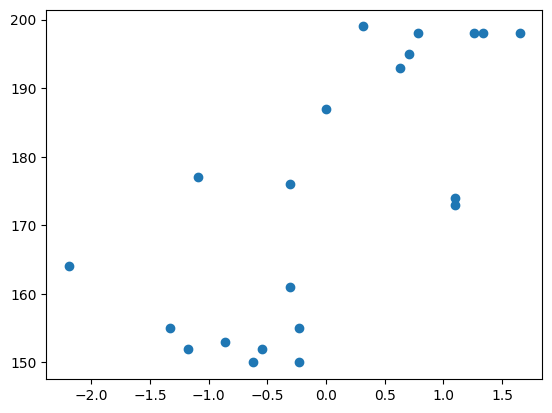

In [34]:
plt.scatter(X_train,y_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor=LinearRegression()

In [37]:
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [13.45484268]
Intercept: 174.1904761904762


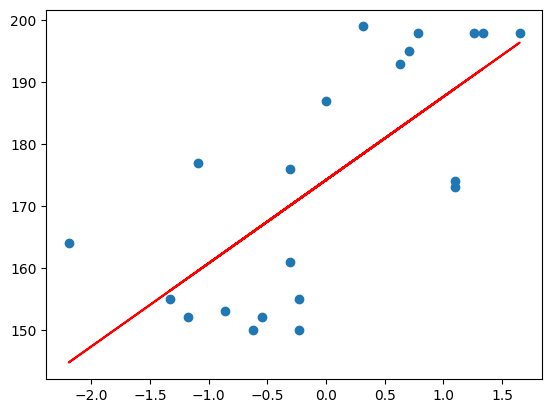

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [47]:
y_pred_test=regressor.predict(X_test)

In [49]:
y_pred_test,y_test

(array([ 914.20682355,  941.11650891, 1371.67147465, 1317.85210393,
        1506.21990144, 1062.21009302]),
 8     155
 13    168
 9     182
 21    194
 0     171
 11    179
 Name: Height_cm, dtype: int64)

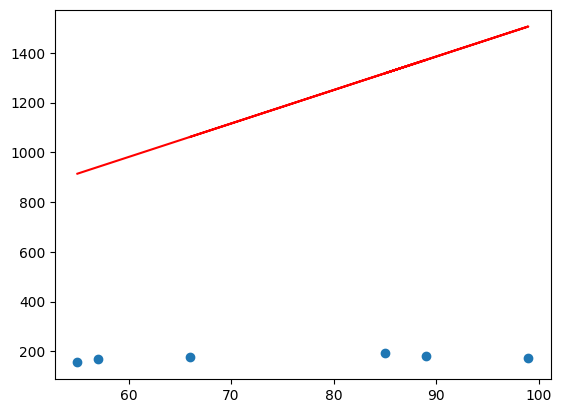

In [52]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [54]:
##performance metrix
##MSE,MAE,RMsE,Rsquare and adjusted r square
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [60]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1069223.0266685807
1010.712817585104
1034.0324108404827


In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test) 


In [58]:
score

-7200.50214407276

In [59]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

-9000.877680090949

In [62]:
scaler_weight=scaler.transform([[80]])
scaler_weight

array([[80.]])

In [67]:
scaler_weight[0]

array([80.])

In [68]:
print("The height prediction for weight 80kg is",regressor.predict([scaler_weight[0]]))

The height prediction for weight 80kg is [1250.57789054]


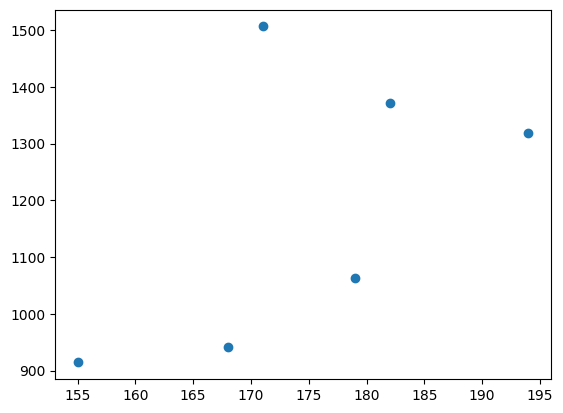

In [69]:
plt.scatter(y_test,y_pred_test)

In [70]:
residuals=y_test-y_pred_test
residuals

8     -759.206824
13    -773.116509
9    -1189.671475
21   -1123.852104
0    -1335.219901
11    -883.210093
Name: Height_cm, dtype: float64

C:\Users\aojha\AppData\Local\Temp\ipykernel_29372\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height_cm', ylabel='Density'>

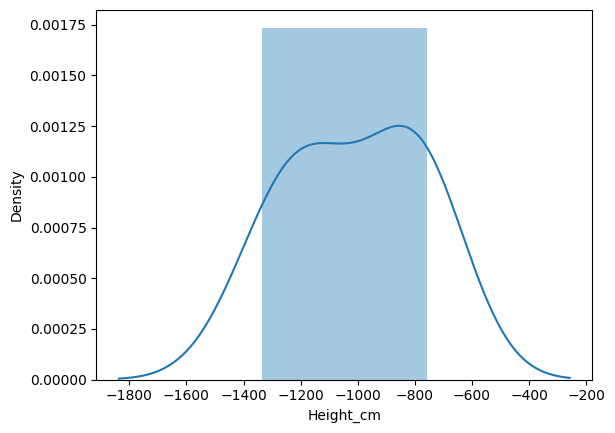

In [72]:
import seaborn as sns
sns.distplot(residuals,kde=True)

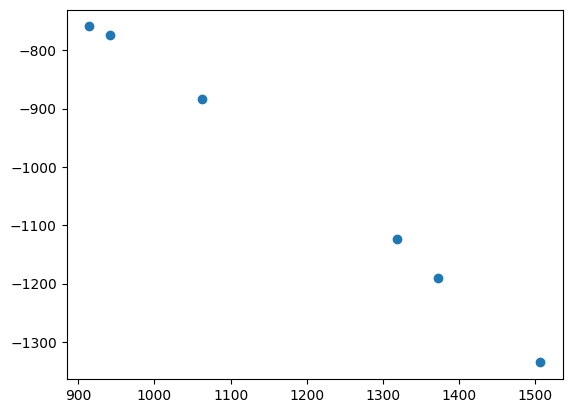

In [73]:
plt.scatter(y_pred_test,residuals)